In [17]:
%matplotlib inline

import stumpy
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
# Replace with your own Radio Data
radio_list = ['A', 'B']

# 3600 to represent one hour of data (in seconds)
event_radios = [random.choice(radio_list) for x in range(3600)]

In [5]:
# 1 March 2023 00:00:00 - 1 March 2023 00:59:59
event_dates = [x for x in range(1677628800, 1677632400)]

In [7]:
len(event_radios)

3600

In [6]:
len(event_dates)

3600

In [8]:
# Combine both lists into a tuple
events = tuple(zip(event_dates, event_radios))

In [9]:
# DataFrame of the events
df = pd.DataFrame(events, columns=['date_time', 'radio_type'])

In [10]:
# Get dummies to switch non numerical columns into numerical ones
df = pd.get_dummies(df, prefix='Radio', prefix_sep='_')

In [11]:
df.head()

,date_time,Radio_A,Radio_B
0,1677628800,0,1
1,1677628801,1,0
2,1677628802,0,1
3,1677628803,0,1
4,1677628804,1,0


In [14]:
# Once the column is numerical, switch to a float for stumpy/ML usage later
df['Radio_A'] = df['Radio_A'].astype('float')
df['Radio_B'] = df['Radio_B'].astype('float')

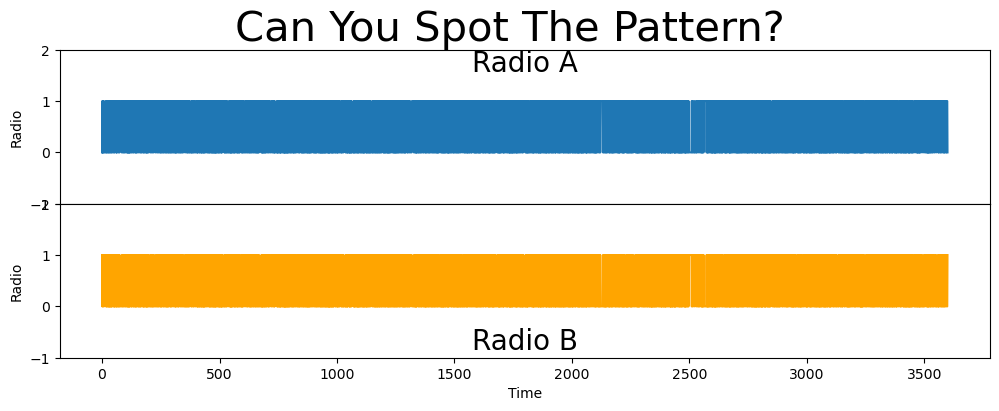

In [30]:
# Can I spot the difference? No. It's too busy again. Need HS data for more realistic results.
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Pattern?', fontsize='30')
axs[0].set_title('Radio A', fontsize=20, y=0.8)
axs[1].set_title('Radio B',  fontsize=20, y=0)
axs[1].set_xlabel('Time')
axs[0].set_ylabel('Radio')
axs[1].set_ylabel('Radio')
ylim_lower = -1
ylim_upper = 2
axs[0].set_ylim(ylim_lower, ylim_upper)
axs[1].set_ylim(ylim_lower, ylim_upper)
axs[0].plot(df['Radio_A'])
axs[1].plot(df['Radio_B'], c='orange')
plt.rcParams['figure.figsize'] = [12, 4]
plt.show()

In [29]:
# m is the number of samples per 'event window' - in this instance I chose 60 seconds / 1 minute
m = 60

# You can compare two seperate sets of results using T_A and T_B
# For every subsequence in T_A, its nearest neighbor in T_B will be recorded.
radio_mp = stumpy.stump(T_A = df['Radio_A'],
                  m = m,
                  T_B = df['Radio_B'],
                  ignore_trivial = False)

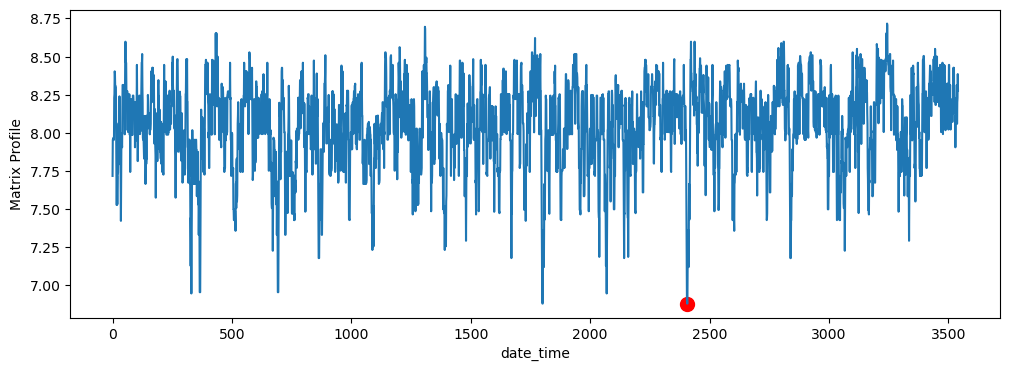

In [31]:
# Plot the motif as a red pointer - just another technique to clearly highlight where the motif lies
radio_motif_index = radio_mp[:, 0].argmin()
plt.xlabel('Date Time')
plt.ylabel('Matrix Profile')
plt.scatter(radio_motif_index,
               radio_mp[radio_motif_index, 0],
               c='red',
               s=100)
plt.plot(radio_mp[:,0])
plt.show()

In [32]:
# Motif index in the dataset
radio_A_motif_index = radio_mp[:, 0].argmin()
print(f'The motif is located at index {radio_A_motif_index} of "Radio A"')

The motif is located at index 2406 of "Radio A"


In [33]:
# Nearest neighbour in the dataset
radio_B_motif_index = radio_mp[radio_A_motif_index, 1]
print(f'The motif is located at index {radio_B_motif_index} of "Radio B"')

The motif is located at index 1800 of "Radio B"


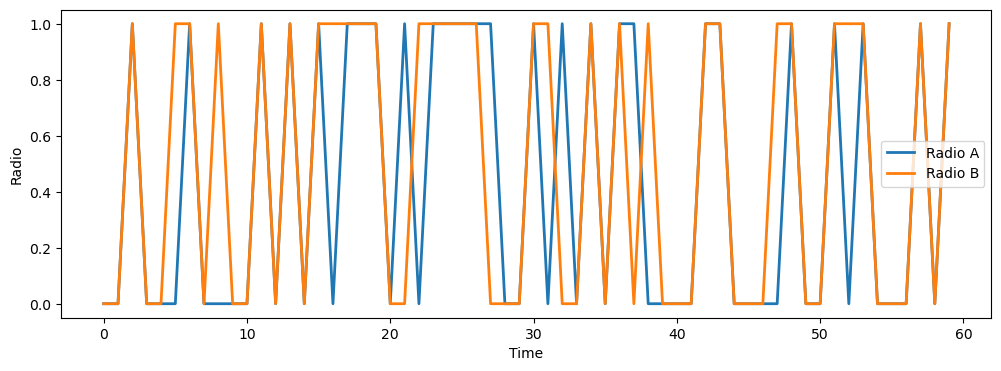

In [49]:
# Plot the motif and the nearest neighbour side by side for easy comparison
# Should be much clearer patterns on HS.
plt.plot(df['Radio_A'].iloc[radio_A_motif_index: radio_A_motif_index + m].values, label='Radio A', linewidth=2, markersize=12)
plt.plot(df['Radio_B'].iloc[radio_B_motif_index: radio_B_motif_index + m].values, label='Radio B', linewidth=2, markersize=12)
plt.xlabel('Time')
plt.ylabel('Radio')
plt.legend()
plt.show()